In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
data = pd.read_csv("./HMEQ.csv",engine="python")
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
data.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
data["JOB"].fillna("Other",inplace=True)
data.fillna(data.mean(),inplace=True)

In [7]:
df_hmeq_dummy = pd.get_dummies(data)
df_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
df_hmeq_y = df_hmeq_dummy["BAD"]
df_hmeq_x = df_hmeq_dummy.drop("BAD",axis=1, inplace=False)
df_hmeq_train_x, df_hmeq_test_x, df_hmeq_train_y, df_hmeq_test_y = train_test_split(df_hmeq_x, df_hmeq_y,test_size=0.30,random_state=1234)

print("train data X size:",df_hmeq_train_x.shape)
print("train data Y size:",df_hmeq_train_x.shape)
print("test data X size:",df_hmeq_test_x.shape)
print("test data Y size:",df_hmeq_test_x.shape)

train data X size: (2623, 18)
train data Y size: (2623, 18)
test data X size: (1125, 18)
test data Y size: (1125, 18)


In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_hmeq_train_x,df_hmeq_train_y)
print("Accucary on trainning set: %.3f"% tree_uncustomized.score(df_hmeq_train_x, df_hmeq_train_y))
print("Accucary on test set: %.3f"% tree_uncustomized.score(df_hmeq_test_x, df_hmeq_test_y))

Accucary on trainning set: 1.000
Accucary on test set: 0.932


In [12]:
train_accuracy =[]
test_accuracy = []

para_criterion = ['gini',"entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion=criterion, random_state=1234)
    tree1.fit(df_hmeq_train_x,df_hmeq_train_y)
    train_accuracy.append(tree1.score(df_hmeq_train_x,df_hmeq_train_y))
    test_accuracy.append(tree1.score(df_hmeq_test_x,df_hmeq_test_y))
    
df_accuracy1 = pd.DataFrame()
df_accuracy1["Criterion"] = para_criterion
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.932
1,entropy,1.0,0.936


In [49]:
train_accuracy =[]
test_accuracy = []

para_criterion = []
para_max_depth=[]

n_iter_depth = 10
list_criterion = ['gini',"entropy"]

for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, random_state=1234)
        tree2.fit(df_hmeq_train_x,df_hmeq_train_y)

        train_accuracy.append(tree2.score(df_hmeq_train_x,df_hmeq_train_y))
        test_accuracy.append(tree2.score(df_hmeq_test_x,df_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [50]:
df_accuracy2 = pd.DataFrame()
df_accuracy2["Criterion"] = para_criterion
df_accuracy2["Depth"] = para_max_depth
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,1.0,0.932
1,gini,2,1.0,0.932
2,gini,3,1.0,0.932
3,gini,4,1.0,0.932
4,gini,5,1.0,0.932
5,gini,6,1.0,0.932
6,gini,7,1.0,0.932
7,gini,8,1.0,0.932
8,gini,9,1.0,0.932
9,gini,10,1.0,0.932


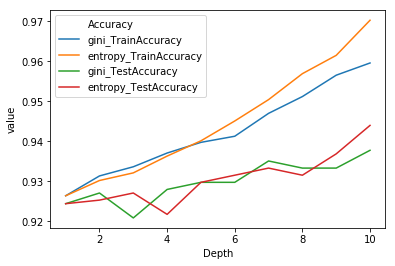

In [18]:
df_accuracy2_melt = pd.melt(df_accuracy2, id_vars=["Criterion","Depth"])
df_accuracy2_melt["Accuracy"] = df_accuracy2_melt["Criterion"] +"_"+ df_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=df_accuracy2_melt)

In [34]:
train_accuracy = []; test_accuracy = []
para_criterion = []; para_max_depth = []; para_min_leaf_size = []
max_depth = 10

list_min_leaf_size = [i*10 for i in range(1,6)]

for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                       min_samples_leaf=leafsize, random_state=1234)
        
        tree3.fit(df_hmeq_train_x,df_hmeq_train_y)
        train_accuracy.append(tree3.score(df_hmeq_train_x,df_hmeq_train_y))
        test_accuracy.append(tree3.score(df_hmeq_test_x,df_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [35]:
df_accuracy3 = pd.DataFrame()
df_accuracy3["Criterion"] = para_criterion
df_accuracy3["Depth"] = para_max_depth
df_accuracy3["MinLeafSize"] = para_min_leaf_size
df_accuracy3["TrainAccuracy"] = train_accuracy
df_accuracy3["TestAccuracy"] = test_accuracy
df_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.947,0.925
1,gini,10,20,0.934,0.920
2,gini,10,30,0.930,0.925
3,gini,10,40,0.926,0.924
4,gini,10,50,0.926,0.924
5,entropy,10,10,0.944,0.924
6,entropy,10,20,0.932,0.923
7,entropy,10,30,0.930,0.925
8,entropy,10,40,0.926,0.924
9,entropy,10,50,0.926,0.924


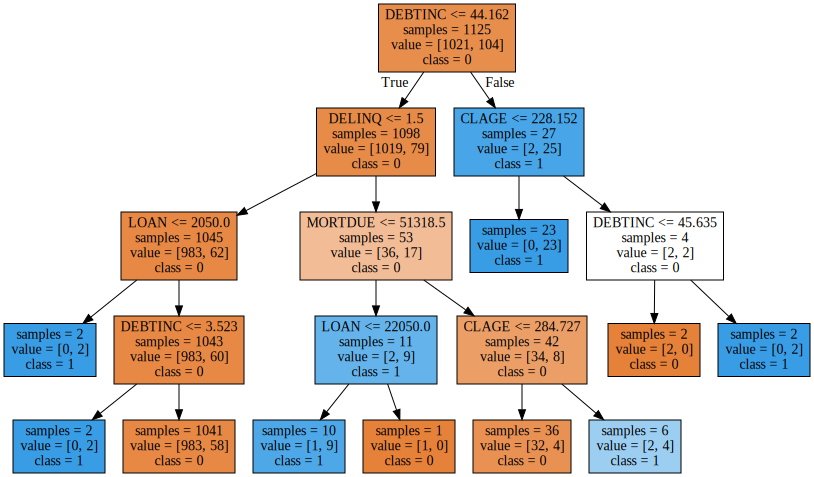

In [40]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=1234)
tree.fit(df_hmeq_test_x,df_hmeq_test_y)

export_graphviz(tree,out_file="tree.dot", class_names=['0','1'], feature_names=df_hmeq_test_x.columns,
                impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
tree4 = D